In [ ]:

!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
dataframe = pd.read_excel("/content/stc TV Data Set_T3.xlsb")

ValueError: ignored

In [ ]:
dataframe.shape

(1048575, 5)

In [ ]:
# display the first 5 rows 
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating
count,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00
std,1.003513e+04,1.119837e+00
min,1.000000e+00,1.000000e+00
25%,8.253000e+03,1.000000e+00
50%,1.714900e+04,2.000000e+00
75%,2.566500e+04,3.000000e+00
max,3.428000e+04,4.000000e+00


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [ ]:
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
def content_based_recommender(program_name, sim_scores=sim_matrix):
    idx = indices[program_name]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['program_name'].iloc[movie_indices]

In [ ]:
no_user_voted = dataframe.groupby('program_name')['rating'].agg('count')
no_movies_voted = dataframe.groupby('user_id_maped')['rating'].agg('count')

In [ ]:
no_user_voted

<bound method NDFrame._add_numeric_operations.<locals>.sum of program_name
#FollowFriday                    510
10 Days in a Madhouse            553
100 treets                      1851
101 Dalmatians                   118
102 Dalmatians                   172
                                ... 
iCarly  iWant A World Record     172
iCarly  iWant More Viewers       217
iCarly  iWill Date Freddie       183
xXx                               94
xXx: Return of Xander Cage       853
Name: rating, Length: 8013, dtype: int64>

In [ ]:
no_movies_voted

user_id_maped
1          7
5        155
9         44
11       131
15       391
        ... 
34269      1
34271     15
34273      2
34277     35
34280      2
Name: rating, Length: 11578, dtype: int64

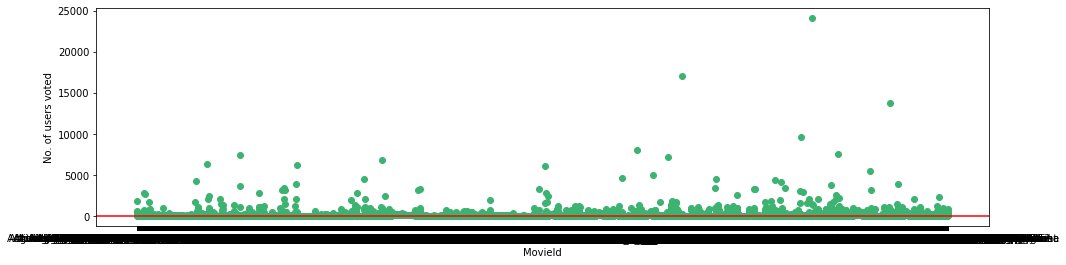

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

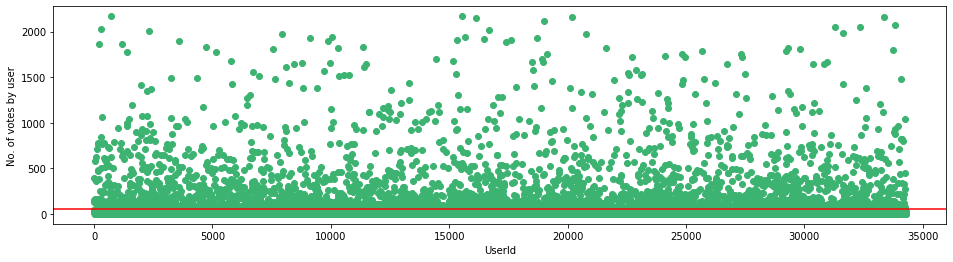

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
# Calculate mean rating of all movies
dataframe.groupby('program_name')['rating'].mean().sort_values(ascending=False).head()


program_name
World's Best Chefs  Alex Atala                  4.0
Criminal Minds     The Lesson                   4.0
Criminal Minds     Children Of The Dark         4.0
Scandal     candal     Enemy Of The tate        4.0
Scandal     candal     Grant: For The People    4.0
Name: rating, dtype: float64

In [ ]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(dataframe.groupby('program_name')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(dataframe.groupby('program_name')['rating'].count())

ratings.head()


,rating,num of ratings
program_name,,
#FollowFriday,1.784314,510
10 Days in a Madhouse,1.707052,553
100 treets,1.836305,1851
101 Dalmatians,1.466102,118
102 Dalmatians,1.558140,172


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline


In [ ]:
# Sorting values according to
# the 'num of rating column'
moviemat = dataframe.pivot_table(index ='user_id_maped',
			columns ='program_name', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)


,rating,num of ratings
program_name,,
The Boss Baby,2.008858,24047
Pingu,2.819903,17063
Trolls,1.996592,13793
The Adventures of Petey and Friends,1.824698,9612
Moana,2.082911,8081
The Mermaid Princess,1.854352,7525
Baywatch,1.817913,7436
Oscar's Oasis,2.857681,7174
Ferdinand,1.941030,6817


In [ ]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [ ]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['The Boss Baby']
liarliar_user_ratings = moviemat['Moana']

starwars_user_ratings.head()


user_id_maped
1     1.00
5      NaN
9     1.40
11    3.25
15    2.00
Name: The Boss Baby, dtype: float64

In [ ]:
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
program_name,
#FollowFriday,0.259187
10 Days in a Madhouse,0.221786
100 treets,-0.015155
101 Dalmatians,-0.038588
102 Dalmatians,0.113054


In [ ]:
# Similar movies like starwars
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()


,Correlation,num of ratings
program_name,,
The Boss Baby,1.000000,24047
Kingsman: The ecret ervice,0.600823,198
Bolt,0.593000,103
Inside Out,0.559778,296
Tell,0.540154,129


In [ ]:
# Similar movies as of liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head(10)


,Correlation,num of ratings
program_name,,
Moana,1.000000,8081
Cruel Intentions,0.868270,137
Friends The One With The Apothecary Table,0.812996,122
Cheaper by the Dozen,0.799109,217
Friends The One With The Ring,0.794345,105
Friends The One With Rachel's Inadvertent Kiss,0.731092,148
Friends The One That Could Have Been Part I,0.684199,115
Friends The One With Phoebe's Husband,0.675336,149
Friends The One Where Joey Loses His Insurance,0.665022,128


In [ ]:
#show the recommendations (top 5) for the people who watched "Moana" movie
dataframe.query("program_name=='Moana'").sort_values('rating', ascending = False).head(10)



,user_id_maped,program_name,rating,date_,program_genre
1048574,19844,Moana,4,2017-05-02,Drama
938159,16353,Moana,4,2017-06-07,Comedy
413824,6472,Moana,4,2017-10-22,Drama
938162,23042,Moana,4,2017-05-04,Drama
413819,28584,Moana,4,2018-02-26,Action
413818,5776,Moana,4,2017-07-25,Action
413812,5820,Moana,4,2017-11-29,Animation
413810,29318,Moana,4,2017-04-23,Thriller
413808,26483,Moana,4,2017-12-10,Action
413806,16651,Moana,4,2017-10-01,Horror
